# Pymaceuticals Inc.
---

### Analysis

Based upon the final tumor volumes of the four drugs; Capomulin, Ramicane, Infubinol ,and Ceftamin-the Ramicane data shows that it has the strongest effect.

t Capomul seems to have a correlation with mouse wieght and final tumor volume which does not look promising in the area of cancer reserach.g.In the tial outlmens, Infubinol was the only regimen texhibited the anomoly out of the four drugs onAccording to this dataset and for homework purposes, ramicane produced the most favorable data sets.
place.
 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_meta_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse_ID","Mouse_ID"])


mouse_meta_study

# Display the data table for preview


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
mouse_metadata["Mouse_ID"].count()

249

In [11]:
# Checking the number of mice.
mouse_count = mouse_meta_study["Mouse_ID"].unique()
mouse_count


array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [12]:
tot_mouse = mouse_meta_study.Mouse_ID.value_counts()
tot_mouse

Mouse_ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_ID_Time = mouse_meta_study.set_index(["Mouse_ID", "Timepoint"])
mouse_ID_Time


Drug_Regimen   Sex  Age_months  Weight_(g)  \
Mouse_ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor_Volume_(mm3)  Metastatic Sites  
Mouse_ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1893 rows x 6 columns]

In [14]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for i,x in enumerate(mouse_meta_study.duplicated(subset=['Mouse_ID',"Timepoint"])):
    if x==True:
        print(mouse_meta_study.iloc[i,0:2]) 

Mouse_ID            g989
Drug_Regimen    Propriva
Name: 909, dtype: object
Mouse_ID            g989
Drug_Regimen    Propriva
Name: 911, dtype: object
Mouse_ID            g989
Drug_Regimen    Propriva
Name: 913, dtype: object
Mouse_ID            g989
Drug_Regimen    Propriva
Name: 915, dtype: object
Mouse_ID            g989
Drug_Regimen    Propriva
Name: 917, dtype: object


In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_meta_study.loc[mouse_meta_study["Mouse_ID"]=="g989",:]

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
print("Unclean",mouse_meta_study["Mouse_ID"].count(),"datapoints.\n")
clean_mouse=mouse_meta_study[mouse_meta_study["Mouse_ID"] != 'g989']
# Checking the number of mice in the clean DataFrame.
print("Clean",clean_mouse["Mouse_ID"].count(),"datapoints.")
clean_mouse.count()

Unclean 1893 datapoints.

Clean 1880 datapoints.


Mouse_ID              1880
Drug_Regimen          1880
Sex                   1880
Age_months            1880
Weight_(g)            1880
Timepoint             1880
Tumor_Volume_(mm3)    1880
Metastatic Sites      1880
dtype: int64

In [27]:
clean_mouse

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Grp=clean_mouse.groupby(["Drug_Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary=Summary_Grp["Tumor_Volume_(mm3)"].mean().reset_index(name="Mean_Tumor_Volume")
Summary=pd.merge(Summary,Summary_Grp["Tumor_Volume_(mm3)"].median().reset_index(name="Median Tumor Volume"),on="Drug_Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor_Volume_(mm3)"].var().reset_index(name="Tumor_Volume_Variance"),on="Drug_Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor_Volume_(mm3)"].std().reset_index(name="Tumor_Volume_Std. Deviation"),on="Drug_Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor_Volume_(mm3)"].sem().reset_index(name="Tumor_Volume_SEM"),on="Drug_Regimen",how="left")

In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
Summ_2=clean_mouse[["Drug_Regimen","Tumor_Volume_(mm3)"]].groupby(["Drug_Regimen"]).agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
Summ_2


Tumor_Volume_(mm3)                                          
                           mean     median        var       std       sem
Drug_Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

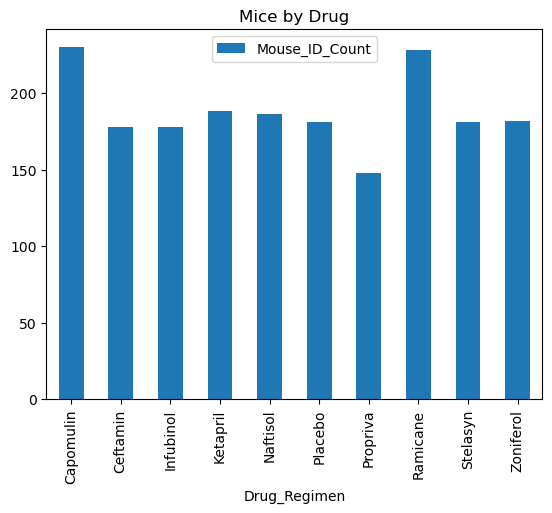

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mouse.groupby(["Drug_Regimen"])["Mouse_ID"].count().reset_index(name="Mouse_ID_Count").plot.bar(x="Drug_Regimen",y="Mouse_ID_Count",title="Mice by Drug")
plt.show()

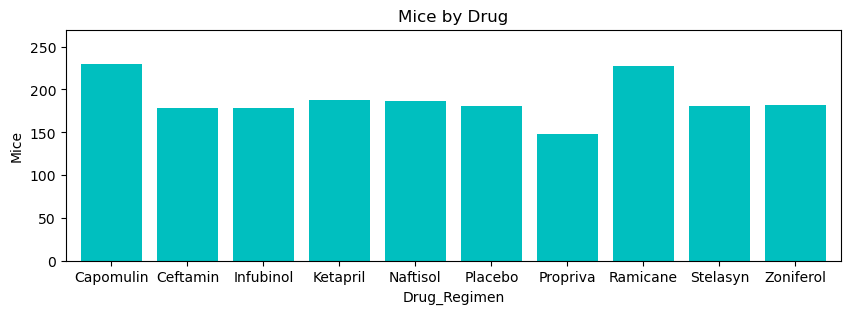

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
barPlot=clean_mouse.groupby(["Drug_Regimen"])["Mouse_ID"].count().reset_index(name="Mouse_ID_Count")
bars=barPlot["Mouse_ID_Count"]
x_axis=np.arange(len(bars))
Regimens=barPlot["Drug_Regimen"]
plt.figure(figsize=(10,3))
plt.bar(x_axis,bars,color="c")
tick_locations=[x for x in x_axis]
plt.xticks(tick_locations,Regimens)
plt.xlim(-.6,9.6)
plt.ylim(0,270)
plt.title("Mice by Drug")
plt.xlabel("Drug_Regimen")
plt.ylabel("Mice")
plt.show()

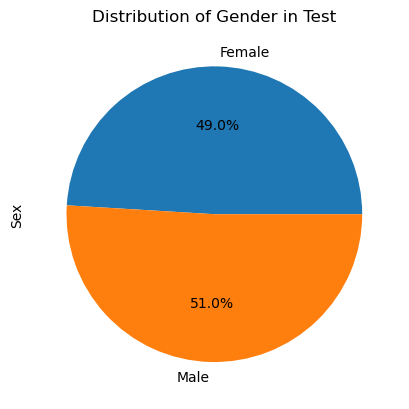

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse.groupby(["Sex"])["Mouse_ID"].count().plot.pie(title="Distribution of Gender in Test",label="Sex",autopct="%1.1f%%")
plt.show()

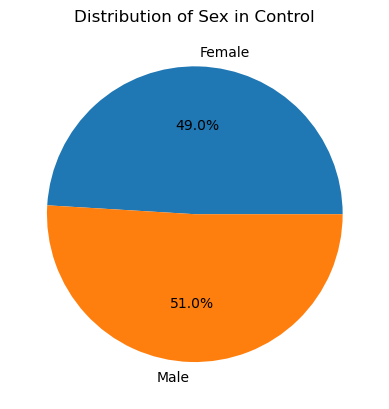

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
piePlot=clean_mouse.groupby(["Sex"])["Mouse_ID"].count().reset_index(name="Mouse_ID_Count")
labs = piePlot["Sex"]
Count = piePlot["Mouse_ID_Count"]
plt.pie(Count, labels=labs,autopct="%1.1f%%")
plt.title("Distribution of Sex in Control")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treat_reg=clean_mouse.loc[(clean_mouse["Drug_Regimen"]=="Capomulin")|(clean_mouse["Drug_Regimen"]=="Ramicane")|(clean_mouse["Drug_Regimen"]=="Infubinol")|(clean_mouse["Drug_Regimen"]=="Ceftamin") ,:]
# Start by getting the last (greatest) timepoint for each mouse
four_treat_reg=four_treat_reg.groupby(["Drug_Regimen","Mouse_ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_treat_reg=pd.merge(four_treat_reg,clean_mouse[["Mouse_ID","Timepoint","Tumor_Volume_(mm3)"]],on=["Mouse_ID","Timepoint"],how="left")
four_treat_reg

,Drug_Regimen,Mouse_ID,Timepoint,Tumor_Volume_(mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[] for i in range(4)]
for i in range(100):
    DR=four_treat_reg.iloc[i,:]["Drug_Regimen"]
    Tum=four_treat_reg.iloc[i,:]["Tumor_Volume_(mm3)"]
    for j in range(4):
        if DR==Treatments[j]:
            Tumors[j].append(Tum)
            continue

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(4)]
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for Num,Treatment in enumerate(Treatments):
    quartiles[Num] = four_treat_reg.loc[four_treat_reg["Drug_Regimen"]==Treatment,:]["Tumor_Volume_(mm3)"].quantile([.25,.5,.75])
    lowerq[Num] = quartiles[Num][0.25]
    upperq[Num] = quartiles[Num][0.75]
    iqr[Num] = upperq[Num]-lowerq[Num]

    print(f"The lower quartile of {Treatment} tumor volume is: {lowerq[Num]}")
    print(f"The upper quartile of {Treatment} tumor volume is: {upperq[Num]}")
    print(f"The interquartile range of {Treatment} tumor volume is: {iqr[Num]}")
    print(f"The the median of {Treatment} tumor volume is: {quartiles[Num][0.5]} ")
   # add subset
    lower_bound[Num] = lowerq[Num] - (1.5*iqr[Num])
    upper_bound[Num] = upperq[Num] + (1.5*iqr[Num])
    print(f"Values below {lower_bound[Num]} could be outliers.")
    print(f"Values above {upper_bound[Num]} could be outliers.")
     
    # Determine outliers using upper and lower bounds
for Tumor in Tumors[Num]:
    if Tumor>upper_bound[Num] or Tumor < lower_bound[Num]:
            potential_outliers[Num].append(Tumor)
    if len(potential_outliers[Num])>0:
        print(f"The the potential outliers for {Treatment} are: {potential_outliers[Num]}\n")
    else:
        print(f"There are no potential outliers for {Treatment}.\n")
    endif

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infubinol tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values abo

NameError: name 'endif' is not defined

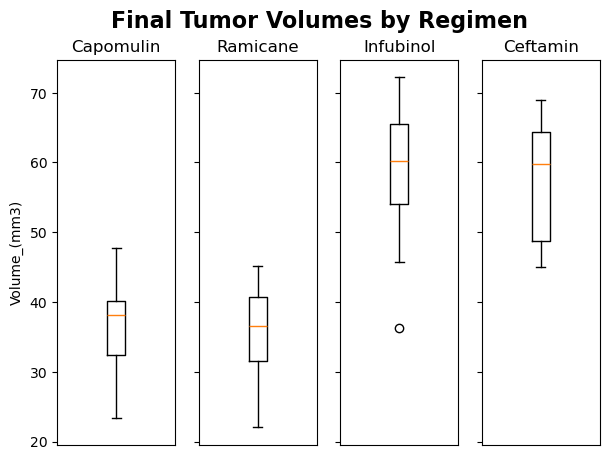

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,sharey=True,figsize=(7,5))
fig.suptitle("Final Tumor Volumes by Regimen", fontsize=16, fontweight="bold")

ax1.set_ylabel('Volume_(mm3)')
ax1.set_title(Treatments[0])
ax1.boxplot(Tumors[0])
ax1.set_xticks([])

ax2.set_title(Treatments[1])
ax2.boxplot(Tumors[1])
ax2.set_xticks([])

ax3.set_title(Treatments[2])
ax3.boxplot(Tumors[2])
ax3.set_xticks([])

ax4.set_title(Treatments[3])
ax4.boxplot(Tumors[3])
ax4.set_xticks([])

plt.show()

## Line and Scatter Plots

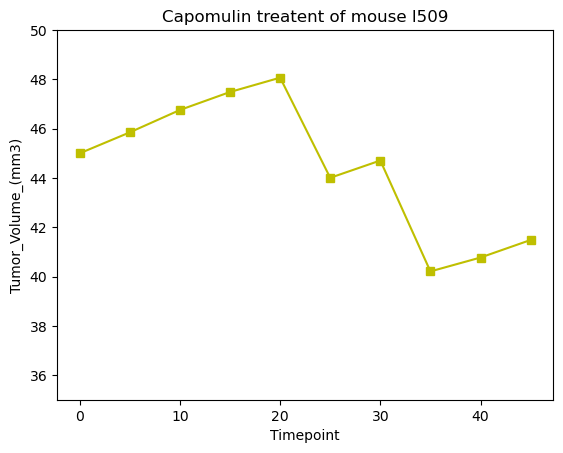

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Single_Mouse=clean_mouse.loc[clean_mouse["Mouse_ID"]=='l509',:]
x_axis=Single_Mouse["Timepoint"].count()
plt.plot(Single_Mouse["Timepoint"],Single_Mouse["Tumor_Volume_(mm3)"],marker='s',color="y")
plt.title("Capomulin treatent of mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor_Volume_(mm3)")
plt.ylim(35,50)
plt.show()

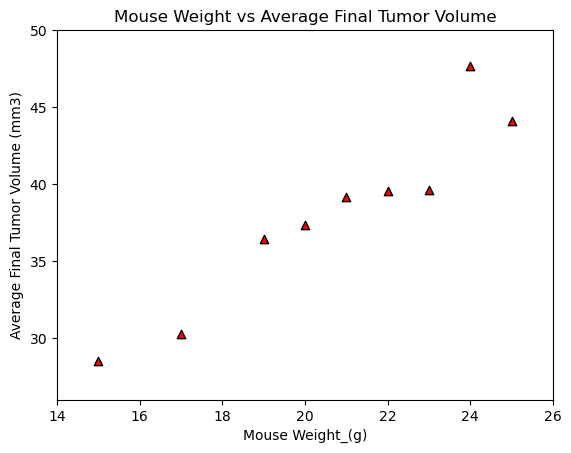

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight_df=clean_mouse.loc[clean_mouse["Drug_Regimen"]=="Capomulin",:]
# Reduce to final timepoint per mouse
mouse_weight_df=mouse_weight_df.groupby(["Drug_Regimen","Mouse_ID"])["Timepoint"].max().reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_weight_df=pd.merge(mouse_weight_df,clean_mouse[["Mouse_ID","Timepoint","Tumor_Volume_(mm3)","Weight_(g)"]],on=["Mouse_ID","Timepoint"],how="left")
mouse_weight_df=mouse_weight_df.groupby(["Weight_(g)"])["Tumor_Volume_(mm3)"].mean().reset_index(name="Average Tumor Volume")


plt.scatter(mouse_weight_df["Weight_(g)"], mouse_weight_df["Average Tumor Volume"], marker="^", facecolors="red", edgecolors="black")
plt.title("Mouse Weight vs Average Final Tumor Volume")
plt.xlabel("Mouse Weight_(g)")
plt.ylabel("Average Final Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(26,50)
plt.show()

In [50]:
mouse_weight_df

,Weight_(g),Average Tumor Volume
0,15,28.484033
1,17,30.287623
2,19,36.416666
3,20,37.311846
4,21,39.175015
5,22,39.571049
6,23,39.602030
7,24,47.685963
8,25,44.060363


## Correlation and Regression

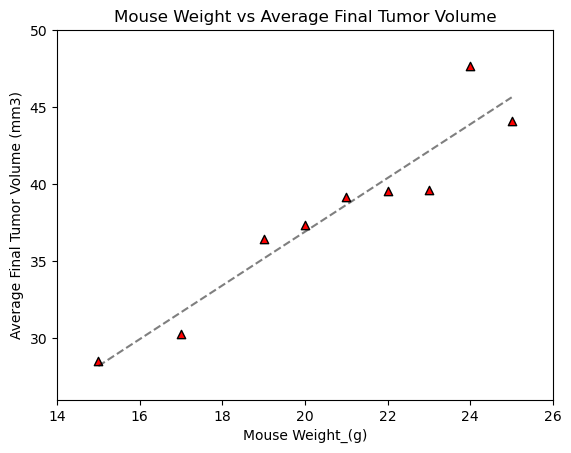

The correlation coefficient between weight and average final tumor volume is 0.95


In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(mouse_weight_df["Weight_(g)"],mouse_weight_df["Average Tumor Volume"])
m_fit = m_slope * mouse_weight_df["Weight_(g)"] + m_int
plt.scatter(mouse_weight_df["Weight_(g)"], mouse_weight_df["Average Tumor Volume"], marker="^", facecolors="red", edgecolors="black")
plt.title("Mouse Weight vs Average Final Tumor Volume")
plt.xlabel("Mouse Weight_(g)")
plt.ylabel("Average Final Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(26,50)
plt.plot(mouse_weight_df["Weight_(g)"],m_fit,"--",color="black",alpha=.5)
plt.show()

#Correlation Coefficient
W=mouse_weight_df["Weight_(g)"]
A=mouse_weight_df["Average Tumor Volume"]
print(f"The correlation coefficient between weight and average final tumor volume is {round(st.pearsonr(W,A)[0],2)}")